In [142]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split

In [93]:
instruments = ["cel", "cla", "flu", "gac", "gel", "org", "pia", "sax", "tru", "vio", "voi"]

path = '../../DataLumenDS/Processed/'

df = pd.DataFrame(columns=['data', 'label'])

for instrument in instruments:
    for root, _, files in os.walk(path + instrument):
        for file in files:
            file_path = os.path.join(root, file)
            data = np.load(file_path)
            data = np.array(data)
            data = data.reshape((data.shape[0], data.shape[1], 1))
            temp = pd.DataFrame({'data': [data], 'label': 1 if instrument == "cel" else 0})
            df = pd.concat([df, temp])

        break

In [95]:
df['data'].iloc[1].shape

(256, 259, 1)

In [134]:
temp_cellist = df[df['label'] == 1]
temp_non_cellist = df[df['label'] == 0]

X_train, X_test, y_train, y_test = train_test_split(temp_cellist['data'], temp_cellist['label'], test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(temp_non_cellist['data'], temp_non_cellist['label'], test_size=0.2, random_state=42)


X_train = pd.concat([X_train, X_train2[:310]])
X_test = pd.concat([X_test, X_test2])
y_train = pd.concat([y_train, y_train2[:310]])
y_test = pd.concat([y_test, y_test2])

X_train = np.stack(X_train)
X_test = np.stack(X_test)
y_train = np.stack(y_train)
y_test = np.stack(y_test)


C:\Users\Karlo\AppData\Local\Temp\ipykernel_18248\3605562656.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  X_train = pd.concat([X_train, X_train2[:310]])
C:\Users\Karlo\AppData\Local\Temp\ipykernel_18248\3605562656.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = pd.concat([y_train, y_train2[:310]])


In [135]:
X_train.shape

(620, 256, 259, 1)

In [139]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(256, 259, 1)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 257, 16)      160       
                                                                 
 conv2d_10 (Conv2D)          (None, 252, 255, 16)      2320      
                                                                 
 flatten_3 (Flatten)         (None, 1028160)           0         
                                                                 
 dense_6 (Dense)             (None, 128)               131604608 
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 131,607,217
Trainable params: 131,607,217
Non-trainable params: 0
_________________________________________________________________


In [148]:
model.compile('Adam', loss='BinaryCrossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=7, 
                    validation_data=(X_test, y_test))

Epoch 1/7
20/20 [==============================] - 30s 1s/step - loss: 0.3866 - accuracy: 0.8323 - val_loss: 0.4724 - val_accuracy: 0.7675
Epoch 2/7
20/20 [==============================] - 29s 1s/step - loss: 0.2198 - accuracy: 0.9403 - val_loss: 0.7928 - val_accuracy: 0.6028
Epoch 3/7
20/20 [==============================] - 30s 2s/step - loss: 0.0952 - accuracy: 0.9855 - val_loss: 0.4466 - val_accuracy: 0.7891
Epoch 4/7
20/20 [==============================] - 30s 1s/step - loss: 0.0283 - accuracy: 1.0000 - val_loss: 0.5674 - val_accuracy: 0.7578
Epoch 5/7
20/20 [==============================] - 29s 1s/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.6343 - val_accuracy: 0.7489
Epoch 6/7
20/20 [==============================] - 29s 1s/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.7090 - val_accuracy: 0.7377
Epoch 7/7
20/20 [==============================] - 29s 1s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6455 - val_accuracy: 0.7608


42/42 - 5s - loss: 0.6455 - accuracy: 0.7608 - 5s/epoch - 119ms/step


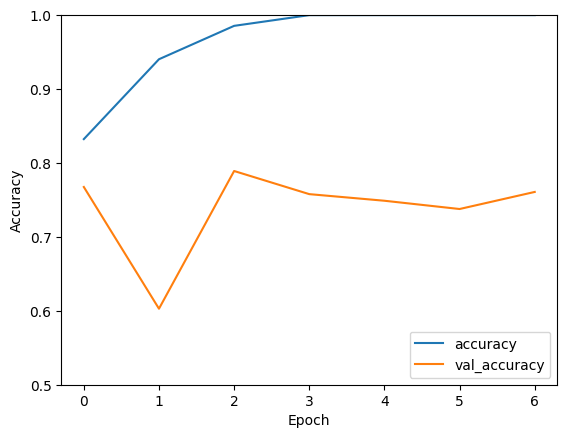

In [149]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [131]:
len(y_train)

5363